# **Задание №5**
## **Метод наименьших квадратов.** 

In [148]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
data = pd.read_csv('data matstat.txt', sep='\s+', header=None)
data = pd.DataFrame(data)

In [156]:
coefs = np.polyfit(data[1], data[0], 1)
polynom = np.poly1d(coefs)

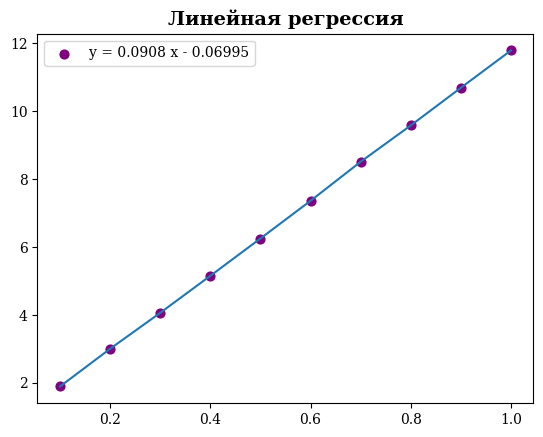

In [179]:
plt.scatter(data[0], data[1], color='purple', s=40, label='y = 0.0908 x - 0.06995')
plt.plot(data[0], data[1])
plt.title('Линейная регрессия', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

## **Другой метод.**

In [135]:
type(data)

pandas.core.frame.DataFrame

In [140]:
from sklearn.linear_model import LinearRegression
data0 = data[0].values.reshape(-1, 1)
data1 = data[1].values
model = LinearRegression()
model.fit(data0, data1)
sample = np.array([0.1, 1.0]).reshape(-1, 1)
pred = model.predict(sample)
print(model.coef_)
print(model.intercept_)
print(pred)

[11.01333333]
0.7706666666666653
[ 1.872 11.784]


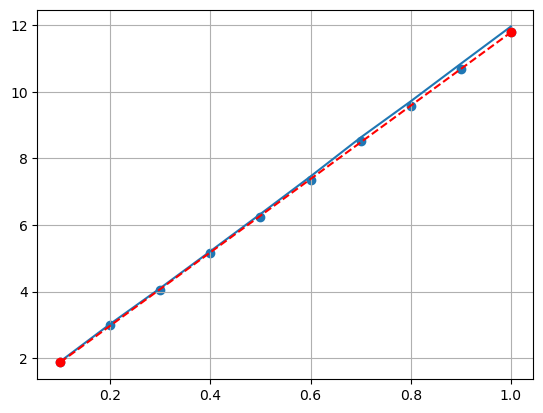

In [142]:
plt.scatter(data0, data1)
plt.plot(data0, polynom(data1))
plt.plot([0.1, 1.0],pred, 'ro--')
plt.grid()
plt.show()

In [167]:
from sklearn.metrics import r2_score
R2 = r2_score(data1, model.predict(data0))
print(R2)

0.9999598952052386


## **Изучение ошибок для некоторого метода**

 
1.016 x - 0.024


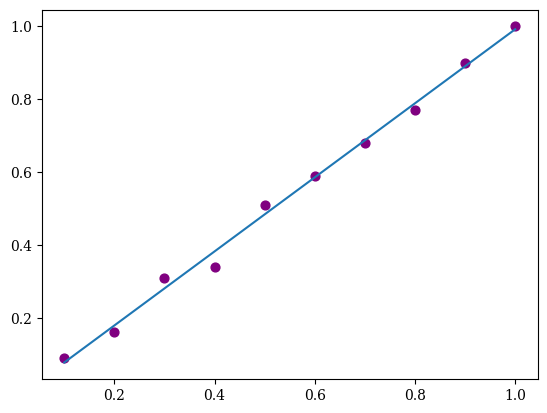

In [168]:
data2 = pd.read_csv('data matstat2.txt', sep='\s+', header=None)
data2 = pd.DataFrame(data2)
coefs = np.polyfit(data2[0], data2[1], 1)
polynom = np.poly1d(coefs)
print(polynom)

plt.scatter(data2[0], data2[1], color='purple', s=40)
plt.plot(data[0], polynom(data2[0]))
plt.show()

In [36]:
data0Arr = data2[0].values.reshape(-1, 1)
data1Arr = data2[1].values

model = LinearRegression()
model.fit(data0Arr, data1Arr)

R2 = r2_score(data1Arr, model.predict(data0Arr))
print(model.coef_)
print(model.intercept_)
print(R2)

[1.01636364]
-0.02400000000000002
0.9948297543814967


In [37]:
print(model.predict(data0Arr))

[0.07763636 0.17927273 0.28090909 0.38254545 0.48418182 0.58581818
 0.68745455 0.78909091 0.89072727 0.99236364]


In [39]:
print(data1Arr)

[0.09 0.16 0.31 0.34 0.51 0.59 0.68 0.77 0.9  1.  ]


In [40]:
residuals = data1Arr - model.predict(data0Arr)
print(residuals)

[ 0.01236364 -0.01927273  0.02909091 -0.04254545  0.02581818  0.00418182
 -0.00745455 -0.01909091  0.00927273  0.00763636]


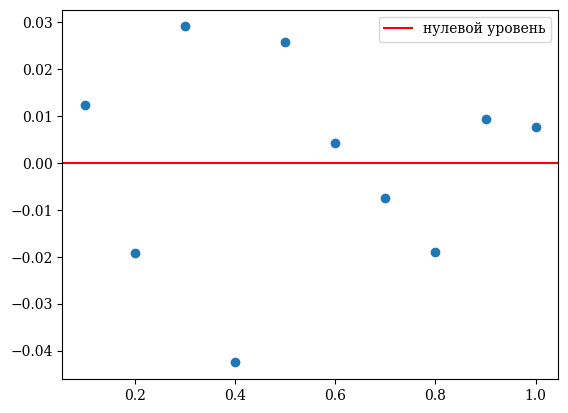

In [174]:
plt.scatter(data[0], residuals)
plt.axhline(y=0, color='red', linewidth=1.5, label="нулевой уровень")
plt.legend()
plt.show()

In [175]:
import scipy.stats
def fTest(firstSample, secondSample):
    firstSample = np.array(firstSample)
    secondSample = np.array(secondSample)
    f = np.var(firstSample, ddof=1) / np.var(secondSample, ddof=1)
    dfn = firstSample.size - 1
    dfd = secondSample.size - 1
    p = 1 - scipy.stats.f.cdf(f, dfn, dfd)
    return (f, p)
fTest(data[0], residuals)

(186.26847290640407, 3.8750216369010104e-09)

## **Многомерная регрессия**

In [176]:
data3 = pd.read_csv('data matstat 3.txt', sep='\s+', header=None)
data3 = pd.DataFrame(data3)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
 1   1       60 non-null     float64
 2   2       60 non-null     float64
 3   3       60 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 2.0 KB


In [177]:
data3 = pd.read_csv('data matstat 3.txt', sep='\s+', header=None)
data3 = pd.DataFrame(data3)
datam = data3
arrow = data3[3]
model = LinearRegression()
model.fit(datam, arrow)
R2 = r2_score(arrow, model.predict(datam))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(R2)

Coefficients: [ 1.35850739e-16 -3.33066907e-16 -1.11022302e-16  1.00000000e+00]
Intercept: 5.329070518200751e-15
1.0


## **красивый бонус))**

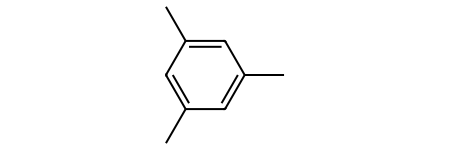

In [178]:
from rdkit import Chem
m = Chem.MolFromSmiles('Cc1cc(C)cc(C)c1')
m